# Iris Flower Classification with Scikit-Learn

In this notebook, we will

1. Load the Iris dataset from a CSV file.
2. Split training data into train and test sets (one train/ test set each for both the features and labels)
3. Train a KNN model using sklearn
4. Evaluate model's performance on the test set.
5. Visually query the model "predictive analytics".


In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns

We are downloading the 'raw' iris data. We explicitly do not want the transformed data. reading for training.


In [2]:
iris_df = pd.read_csv(
    "https://repo.hops.works/master/hopsworks-tutorials/data/iris.csv")
iris_df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,variety
22,4.6,3.6,1.0,0.2,Setosa
120,6.9,3.2,5.7,2.3,Virginica
30,4.8,3.1,1.6,0.2,Setosa
55,5.7,2.8,4.5,1.3,Versicolor
144,6.7,3.3,5.7,2.5,Virginica
75,6.6,3.0,4.4,1.4,Versicolor
58,6.6,2.9,4.6,1.3,Versicolor
95,5.7,3.0,4.2,1.2,Versicolor
36,5.5,3.5,1.3,0.2,Setosa
50,7.0,3.2,4.7,1.4,Versicolor


<Axes: xlabel='variety', ylabel='sepal_length'>

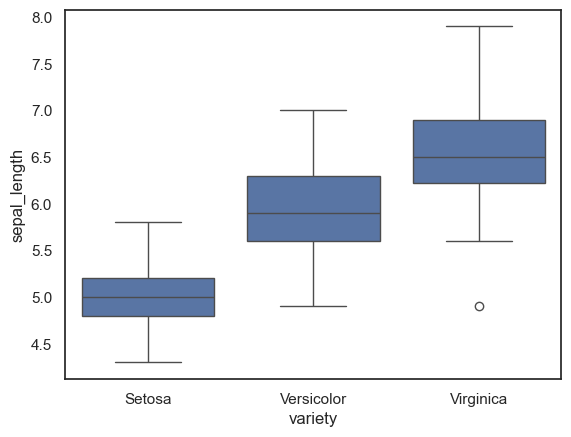

In [3]:
sns.set(style='white', color_codes=True)

sns.boxplot(x='variety', y='sepal_length', data=iris_df)

<Axes: xlabel='variety', ylabel='sepal_width'>

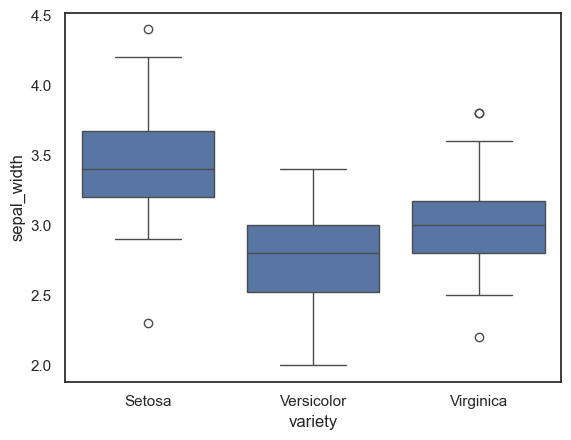

In [4]:
sns.set(style='white', color_codes=True)

sns.boxplot(x='variety', y='sepal_width', data=iris_df)

<Axes: xlabel='variety', ylabel='petal_length'>

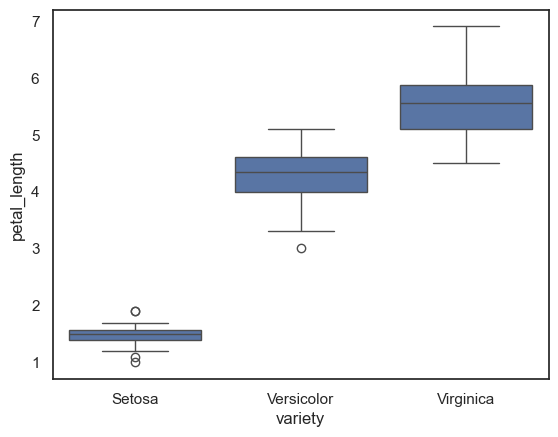

In [5]:
sns.set(style='white', color_codes=True)

sns.boxplot(x='variety', y='petal_length', data=iris_df)

<Axes: xlabel='variety', ylabel='petal_width'>

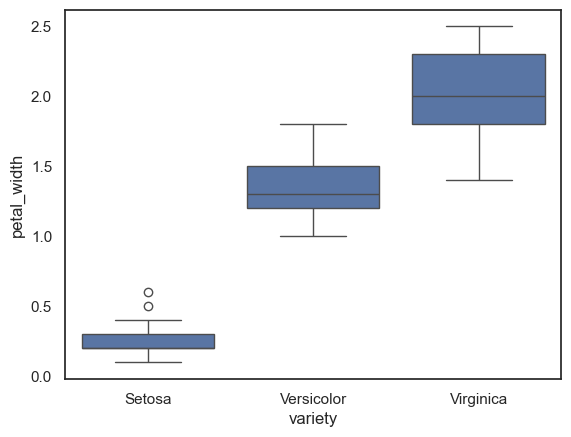

In [6]:
sns.set(style='white', color_codes=True)

sns.boxplot(x='variety', y='petal_width', data=iris_df)

We need to split our DataFrame into two DataFrames.

- The **features** DataFrame will contain the inputs for training/inference.
- The **labels** DataFrame will contain the expected outputs for training/inference.


In [7]:
features = iris_df.drop('variety', axis=1)
labels = iris_df['variety']
features.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
labels.head()

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: variety, dtype: object

We can split our features and labels into a **train_set** and a **test_set**


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42)

y_train[:5]

22        Setosa
15        Setosa
65    Versicolor
11        Setosa
42        Setosa
Name: variety, dtype: object

Transform the labels into numerical values for KNN model.


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

Now, we can fit a model to our features and labels from our training set. Fitting a model to a dataset is more commonly called "training a model".


In [11]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train_encoded)

KNeighborsClassifier(n_neighbors=3)

Now, we have trained our model. We can evaluate our model on the **test_set** to estimate its performance.


In [12]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

We can report on how accurate these predictions compared to the labels


In [13]:
from sklearn.metrics import classification_report
metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

print(metrics)

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 10.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 9.0}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 11.0}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 30.0}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 30.0}}


In [14]:
from sklearn.metrics import confusion_matrix
results = confusion_matrix(y_test_encoded, y_pred)
print(results)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Note in confusion matrix results that we have 1 or 2 incorrect predicitons.


<Axes: >

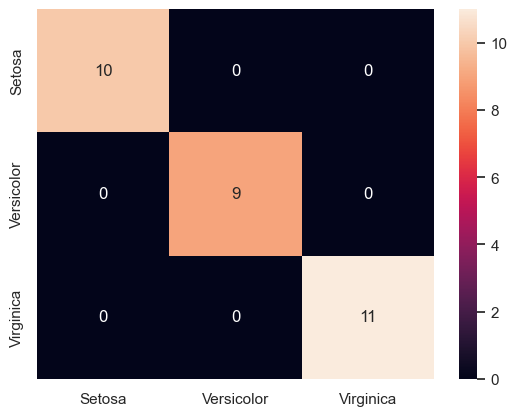

In [15]:
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(results, index=le.classes_, columns=le.classes_)

sns.heatmap(df_cm, annot=True)

In [20]:
import gradio as gr
import numpy as np
from PIL import Image
import requests

def iris(sepal_length, sepal_width, petal_length, petal_width):
    input_list = []
    input_list.append(sepal_length)
    input_list.append(sepal_width)
    input_list.append(petal_length)
    input_list.append(petal_width)
    prediction = model.predict(np.asarray(input_list).reshape(1, -1))

    # Return the predicted flower image from github repo
    flower_url = f"https://raw.githubusercontent.com/amulyaprasanth/serverless-ml-course/main/src/01-module/assets/" + \
        le.classes_[prediction[0]] + ".png"
    img = Image.open(requests.get(flower_url, stream=True).raw)

    return img

In [ ]:
demo = gr.Interface(
    fn=iris,
    title="Iris Flower Predictive Analytics",
    description="Experiment with sepal/petal lengths/widths to predict which flower it is.",
    allow_flagging="never",
    inputs=[
        gr.Number(label="Sepal Length (cm)"),
        gr.Number(label="Sepal Width (cm)"),
        gr.Number(label="Petal Length (cm)"),
        gr.Number(label="Petal Width (cm)"),
    ],
    outputs=[gr.Image(type="pil")])

demo.launch(share=False)

c:\Users\amuly\AppData\Local\pypoetry\Cache\virtualenvs\hopsworks-tutorial-VpIe_r9K-py3.11\Lib\site-packages\gradio\interface.py:403: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


c:\Users\amuly\AppData\Local\pypoetry\Cache\virtualenvs\hopsworks-tutorial-VpIe_r9K-py3.11\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\amuly\AppData\Local\pypoetry\Cache\virtualenvs\hopsworks-tutorial-VpIe_r9K-py3.11\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
